In [1]:
import torch
import torchvision
from torchvision import datasets, transforms, models
from PIL import Image
import matplotlib.pyplot as plt
from helpers import decode_segmap, display_image, get_best_device

In [2]:
# Use eval to enable prediction mode for the model
device = get_best_device()
model = torchvision.models.segmentation.fcn_resnet101(pretrained=True)
model = model.to(device).eval()

Running on the GPU: GeForce GTX 1650


Image shape: (429, 500)


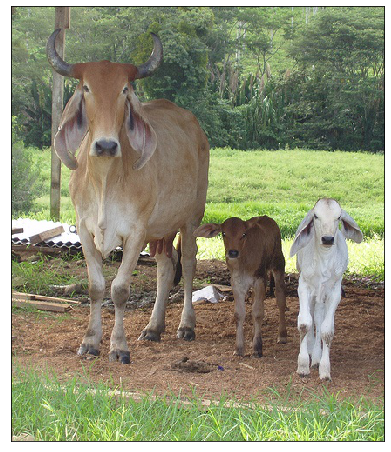

In [3]:
original_filename = '../torch/VOCdevkit/VOC2012/JPEGImages/2007_001299.jpg'
image = Image.open(original_filename)

print("Image shape:", (image.width, image.height))

display_image(image)

In [4]:
transform_pipeline = transforms.Compose([      
    transforms.ToTensor()
])

transformed_image = transform_pipeline(image)
transformed_image = torch.unsqueeze(transformed_image, dim=0)
transformed_image = transformed_image.to(device)

print("Transformed image shape:", transformed_image.shape)

Transformed image shape: torch.Size([1, 3, 500, 429])


In [5]:
out = model(transformed_image)['out']

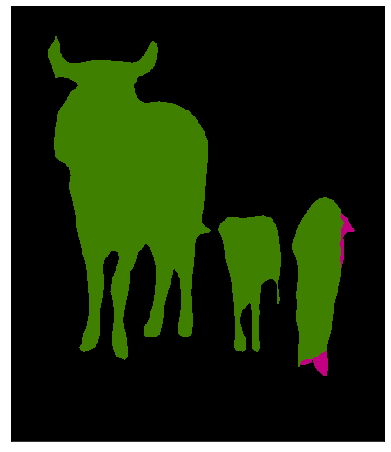

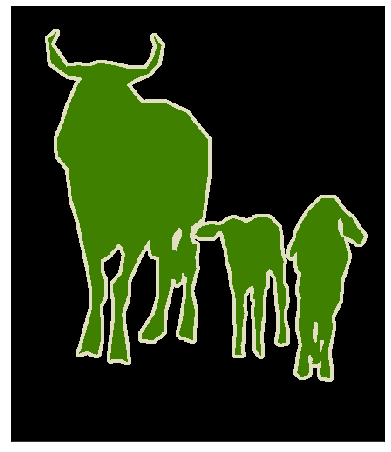

In [6]:
# Extract masks
mask = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
mask = decode_segmap(mask)

display_image(mask)

true_mask = Image.open('../torch/VOCdevkit/VOC2012/SegmentationClass/2007_001299.png')
display_image(true_mask)